In [1]:
%matplotlib inline
import numpy as np, pyross
from matplotlib import pyplot as plt
np.set_printoptions(precision=5)
import pandas as pd

In [2]:
CH, CW, CS, CO = pyross.contactMatrix.UK('klepacEtAl')

In [3]:
CH0, CW0, CS0, CO0 = pyross.contactMatrix.UK()

C = CO0+CS0+CH0+CW0    
C2 = CH+ CW+ CS+ CO

tot (as log)


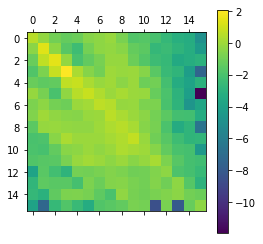

H (not log)


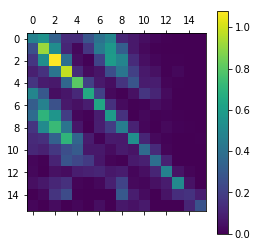

W


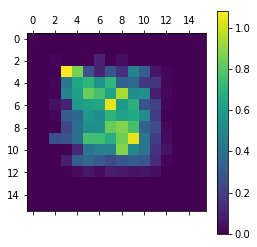

S


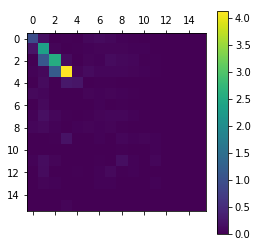

O


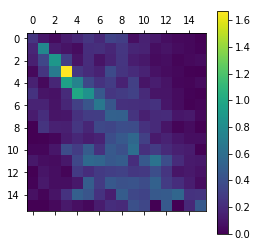

In [4]:
print('tot (as log)')
plt.matshow(np.log(C))
plt.colorbar()
plt.show()
plt.close()

strs = ['H (not log)','W','S','O']
for [ii,CC] in enumerate( [CH0,CW0,CS0,CO0] ):
    print(strs[ii])
    plt.matshow(CC)
    plt.colorbar()
    plt.show()
    plt.close()

tot (as log)


/Users/rsingh/software/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


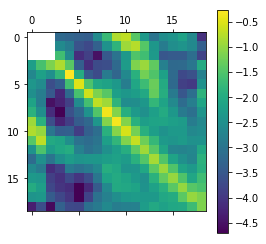

H (not log)


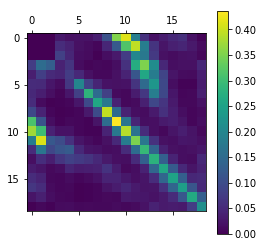

W


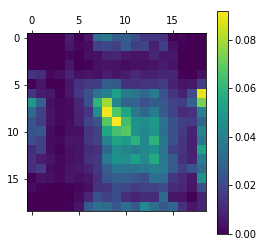

S


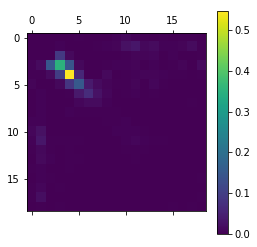

O


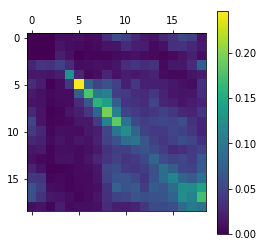

In [5]:
print('tot (as log)')
plt.matshow(np.log(C2))
plt.colorbar()
plt.show()
plt.close()

strs = ['H (not log)','W','S','O']
for [ii,CC] in enumerate( [CH,CW,CS,CO] ):
    print(strs[ii])
    plt.matshow(CC)
    plt.colorbar()
    plt.show()
    plt.close()

In [6]:
numCohorts = 16  ## this is 'M'
numCohPopData = 19  
resident_data_2018_raw = pd.read_csv('EWAgeDistributed.csv')
resident_data_2018_raw2 = pd.read_csv('populationUK.csv')
#resident_data_2018_raw  ## uncomment to show the data

## number in each cohort
Ni=np.zeros(numCohorts)
for i in range(numCohorts):
    Ni[i]=resident_data_2018_raw['Num'][i]
    
## put all the elderly in the last cohort
for i in range(numCohorts, numCohPopData):
    Ni[-1] += resident_data_2018_raw['Num'][i]
    
N = np.sum(Ni)
fi = Ni/N 

np.set_printoptions(precision=3)
print('** N =',int(N),'\n** fi:\n',fi)

** N = 59115809 
** fi:
 [0.059 0.063 0.058 0.055 0.063 0.068 0.067 0.066 0.06  0.068 0.07  0.064
 0.055 0.051 0.049 0.083]


In [12]:
numCohorts2=19
resident_data_2018_raw2 = pd.read_csv('populationUK.csv')
Ni2=np.zeros(numCohorts2)
for i in range(numCohorts2):
    Ni2[i]=resident_data_2018_raw['Num'][i]

N2 = np.sum(Ni2)

fi2 = Ni2/N2

In [13]:
## pick some cohorts to look at, range dispL:dispR
dispL = 2  
dispR = 6
print('selected block of C, cohorts',dispL,'to',dispR,':\n',C[dispL:dispR,dispL:dispR])
print('corresponding elements of fi:\n',fi[dispL:dispR])
print('**\n** clearly C is not going to become symmetric if I multiply rows (or cols) by elements of fi....')

selected block of C, cohorts 2 to 6 :
 [[4.541 0.818 0.142 0.276]
 [2.279 7.873 1.324 0.633]
 [0.27  2.024 2.425 1.295]
 [0.143 0.758 1.731 2.405]]
corresponding elements of fi:
 [0.058 0.055 0.063 0.068]
**
** clearly C is not going to become symmetric if I multiply rows (or cols) by elements of fi....


In [14]:
## pick some cohorts to look at, range dispL:dispR for C2
dispL = 2  
dispR = 6
print('selected block of C, cohorts',dispL,'to',dispR,':\n',C2[dispL:dispR,dispL:dispR])
print('corresponding elements of fi:\n',fi[dispL:dispR]) 

selected block of C, cohorts 2 to 6 :
 [[0.    0.196 0.075 0.016]
 [0.317 0.44  0.246 0.034]
 [0.084 0.17  0.761 0.141]
 [0.026 0.034 0.198 0.614]]
corresponding elements of fi:
 [0.058 0.055 0.063 0.068]


In [15]:
symmC = np.copy(C).T  ## copy C and take transpose.  
symmC *= fi           ## multiply columns of C^T
symmC = symmC.T       ## transpose.  should have multiplied rows of symmC by fi
print('selected block of symmC, cohorts',dispL,'to',dispR,':\n',symmC[dispL:dispR,dispL:dispR])
print('** clearly very far from symmetric')

selected block of symmC, cohorts 2 to 6 :
 [[0.265 0.048 0.008 0.016]
 [0.126 0.436 0.073 0.035]
 [0.017 0.127 0.152 0.081]
 [0.01  0.052 0.118 0.164]]
** clearly very far from symmetric


In [16]:
symmC = np.copy(C2).T  ## copy C and take transpose.  
symmC *= fi2           ## multiply columns of C^T
symmC = symmC.T       ## transpose.  should have multiplied rows of symmC by fi
print('selected block of symmC, cohorts',dispL,'to',dispR,':\n',symmC[dispL:dispR,dispL:dispR])
print('** clearly very far from symmetric')

selected block of symmC, cohorts 2 to 6 :
 [[0.    0.011 0.004 0.001]
 [0.018 0.024 0.014 0.002]
 [0.005 0.011 0.048 0.009]
 [0.002 0.002 0.013 0.042]]
** clearly very far from symmetric


In [17]:
print(fi[dispR-1]*C[dispR-1,dispL])  ## this should be bottom-left element of block above
print(fi[dispL]*C[dispR-1,dispL])    ## this is what we would have got if we multiplied "the wrong way"

0.009706423492808957
0.008327321343102177


In [18]:
print(fi[dispR-1]*C2[dispR-1,dispL])  ## this should be bottom-left element of block above
print(fi[dispL]*C2[dispR-1,dispL])    ## this is what we would have got if we multiplied "the wrong way"

0.0017690542304851142
0.0015177045449889723


In [19]:
## total contacts per day
for jj in range(numCohorts):
    print('coh',jj,'tot contact',np.sum(CH0[:,jj]) )

coh 0 tot contact 2.88202235108567
coh 1 tot contact 4.570980596113428
coh 2 tot contact 5.014540916606705
coh 3 tot contact 4.3992268834826
coh 4 tot contact 2.4174694993059926
coh 5 tot contact 1.9082946129209484
coh 6 tot contact 2.5551881253945403
coh 7 tot contact 3.2100436454664547
coh 8 tot contact 2.9854549803841604
coh 9 tot contact 1.7804642046018513
coh 10 tot contact 1.2404919782050314
coh 11 tot contact 1.0421073726858283
coh 12 tot contact 0.868248251047667
coh 13 tot contact 0.7769218396036686
coh 14 tot contact 0.3556320895602522
coh 15 tot contact 0.373381857850466


In [20]:
## total contacts per day
for jj in range(numCohorts):
    print('coh',jj,'tot contact',np.sum(CH[:,jj]) )

coh 0 tot contact 1.4999999999999998
coh 1 tot contact 1.606
coh 2 tot contact 0.6010000000000001
coh 3 tot contact 0.647
coh 4 tot contact 0.7550000000000001
coh 5 tot contact 0.657
coh 6 tot contact 0.752
coh 7 tot contact 0.821
coh 8 tot contact 1.281
coh 9 tot contact 1.5989999999999998
coh 10 tot contact 1.9389999999999998
coh 11 tot contact 2.179
coh 12 tot contact 2.123
coh 13 tot contact 1.8989999999999998
coh 14 tot contact 1.297
coh 15 tot contact 1.0010000000000001


** elderly contacts, last column of C


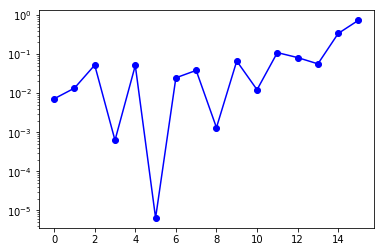

** elderly contacts, last row of C


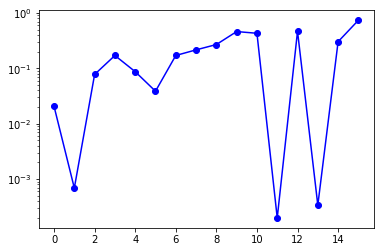

In [21]:
print('** elderly contacts, last column of C')
plt.semilogy(C[:,-1],'bo-')
plt.show()
plt.close()

print('** elderly contacts, last row of C')
plt.semilogy(C[-1,:],'bo-')
plt.show()
plt.close()

** elderly contacts, last column of C


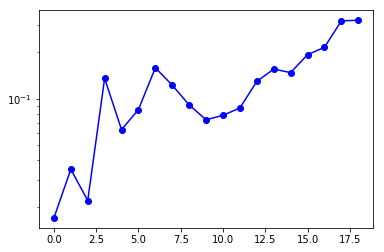

** elderly contacts, last row of C


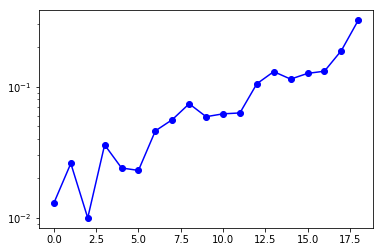

In [22]:
print('** elderly contacts, last column of C')
plt.semilogy(C2[:,-1],'bo-')
plt.show()
plt.close()

print('** elderly contacts, last row of C')
plt.semilogy(C2[-1,:],'bo-')
plt.show()
plt.close()